In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df= pd.read_csv("creditcard.csv")

In [69]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
df.isnull().values.any()

False

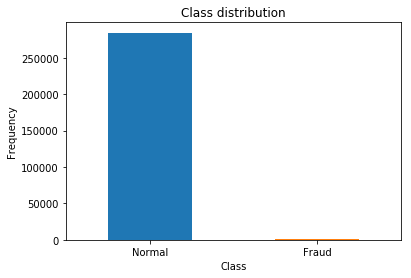

In [95]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
Labels = ["Normal", "Fraud"]
plt.title("Class distribution")
plt.xticks(range(2), Labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [72]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

No Frauds 99.827 % of the dataset
Frauds 0.173 % of the dataset


In [73]:
df['is_duplicated'] = df.duplicated(['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class'],)

In [74]:
df['is_duplicated'].sum()

1081

In [75]:
df_New = df.loc[df['is_duplicated'] == False]

In [96]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

No Frauds 99.827 % of the dataset
Frauds 0.173 % of the dataset


In [77]:
df_New['Class'].value_counts()[1]

473

Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous. Imagine our training data is the one illustrated in graph above. If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99%), but obviously, this model won’t provide any valuable information for us.

In this case, other alternative evaluation metrics can be applied such as:

#Precision/Specificity: how many selected instances are relevant.
#Recall/Sensitivity: how many relevant instances are selected.
#F1 score: harmonic mean of precision and recall.
#MCC: correlation coefficient between the observed and predicted binary classifications.
#AUC: relation between true-positive rate and false positive rate.

In [78]:
df_New= df_New.iloc[:,df_New.columns!='is_duplicated']

In [79]:
import keras
import numpy as np
np.random.seed(2)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [98]:
fraud_indices=np.array(df[df.Class==1].index)
no_records_fraud=len(fraud_indices)
normal_indices=np.array(df[df.Class==0].index)
no_records_normal=len(normal_indices)

print("No. of Fraudulent Transaction is {} and No. of Normal Transaction is {}".format(no_records_fraud, no_records_normal))

No. of Fraudulent Transaction is 492 and No. of Normal Transaction is 284315


In [99]:
X=df.iloc[:,df.columns!='Class']
y=df.iloc[:,df.columns=='Class']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [101]:
# As we have to supply the X test,X_Train,ytest,y_train into deep learning models so we have to convert it into numpy arrays.
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [102]:
X_train.shape

(199364, 30)

In [88]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [103]:
model = Sequential([
     #First Layer
     Dense(units=16, input_dim=30, activation='relu'),
      #Second Layer
     Dense(units=24,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(20,activation='relu'),
     #Fourth Layer
     Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid') 
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_19 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=3)

Epoch 1/3
199364/199364 [==============================] - 12s 58us/step - loss: 0.0423 - acc: 0.9973
Epoch 2/3
199364/199364 [==============================] - 11s 56us/step - loss: 0.0279 - acc: 0.9983
Epoch 3/3
199364/199364 [==============================] - 13s 63us/step - loss: 0.0279 - acc: 0.9983


In [105]:
score=model.evaluate(X_test,y_test)
print(score)

85443/85443 [==============================] - 1s 12us/step
[0.02773039775430765, 0.9982795547909132]


Confusion matrix, without normalization
[[284315      0]
 [   492      0]]


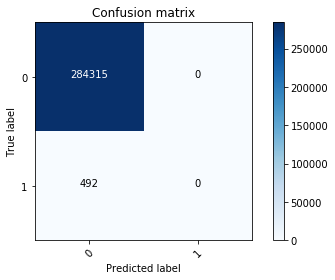

In [106]:
y_pred=model.predict(X)
y_test=pd.DataFrame(y)
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()